# **Generador de canciones**

#**Autores**


*   Laura Camila Cruz de Paula, laccruzpa@unal.edu.co
*   Manuel Andrés Pachón Marín, mpachonm@unal.edu.co



#**Referencias**

1. Curso Minería de datos: https://github.com/AprendizajeProfundo/Ciencia-de-Datos
1.   https://stackabuse.com/text-generation-with-python-and-tensorflow-keras/
2.   https://chunml.github.io/ChunML.github.io/project/Creating-Text-Generator-Using-Recurrent-Neural-Network/
1.   https://unipython.com/generacion-de-textos-con-inteligencia-artificial/
2.   https://colah.github.io/posts/2015-08-Understanding-LSTMs/
1.   https://genius.com/api-clients/new
3. https://towardsdatascience.com/introduction-to-language-models-n-gram-e323081503d9


# **Objetivo**

Generar texto basado en letras en español de diferentes artistas usando una red neuronal de tipo LSTM

#**Algunas definiciones**



*   **Red neuronal recurrente (RNN)**

>Cuando leemos un texto, nuestra comprensión de las palabras nuevas depende de lo que hemos leído anteriormente, nuestro cerebro guarda la información anterior.

> En las redes neuronales tradicionales no se presenta esto, por lo que en ciertas aplicaciones pueden presentarse problemas. Las RNN tienen en cuenta este inconveniente, dado que tienen bucles que permiten tener en cuenta la información pasada.

<center>
<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" alt="drawing" width="600"/>
 <figcaption>Fig.1 - Arquitectura de una RNN.</figcaption>
</center>

>Las RNN tienen diferentes aplicaciones en datos secuenciales y de listas, como texto, reconocimiento de discursos o traducción.

*   **Red LSTM**

>Una de las desventajas de las RNN es que la "memoria" que conservan puede ser de corto plazo, por lo que la información útil podría estar muy lejos del punto que se necesita.

>Las redes LSTM (Long Short Term Memory) son un tipo de RNN que pueden aprender patrones a largo plazo, es decir que pueden recordar información por mucho tiempo, por ejemplo en una secuencia de texto puede recordar las primeras palabras así hayan pasado varios párrafos.


<center>
<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" alt="drawing" width="600"/>
 <figcaption>Fig.2 - Módulo de repetición de una red LSTM.</figcaption>
</center>

*   **N-gram** 

>Un n-gram es una secuencia de n palabras, por lo tanto un bi-gram/2-gram es una secuencia de 2 palabras y así sucesivamente.

>Los modelos de n-grams se usan para estimar la probabilidad de la última palabra de un n-gram dada todas las palabras anteriores, y también para asignar probabilidades a frases completas.




Importación de las liberías necesarias

In [ ]:
!pip install lyricsgenius
!pip install nltk 
import lyricsgenius
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

Lista de artistas elegidos

In [ ]:
artist_name = ["JarabeDePalo","Caifanes","GustavoCerati","Bunbury","LaMoscaTséTsé","LosEnanitosVerdes"]

Descarga de las canciones de los artistas en *artist_name* mediante la API de Genius.com.

En excluded terms se incluyen ciertas palabras en los títulos de las canciones que no contribuyen a la generación del texto, ya que podrían estar duplicadas o son canciones en inglés.


In [ ]:
artist_name = ["Jarabe"]
cantidad=len(artist_name)
listaart=[""]*cantidad
genius = lyricsgenius.Genius("c43DQ0EFHhInkV4Xw389hB7EKeGNhwQDOehiwWHVaQnAEcvSdxIOdcA1JnJbtb4N")
genius.remove_section_headers
genius.skip_non_songs 
genius.excluded_terms = [" (En Vivo)", " (Live)"," (Remix)","Lay Your Head On Me", "cry", "versión", "Dipende", "English"
                          ,"Who", "Watching","Otto", "Longui", "Ragga", "Wake", "Should", "Megamix", "Radio Edit",
                         "Mira Como Viene"]
for elt_id,elt in enumerate(artist_name):
  listaart[elt_id]=genius.search_artist(artist_name[elt_id])
  listaart[elt_id].save_lyrics(extension='json')

Por cada artista se descarga un archivo con extensión .json, acá se unen todos estos archivos en uno

In [ ]:
data=[]
for i in range(len(artist_name)):
  with open('Lyrics_'+ artist_name[i]+'.json') as json_data:
    data.append(json.load(json_data))

A continuación se crea un diccionario donde cada elemento es una canción de las anteriormente descargadas

In [ ]:
data_s=[ pd.DataFrame(dicc['songs']).lyrics for dicc in data]
data_s

[0      [Letra de "La Flaca"]\n\n[Verso 1]\nEn la vida...
 1      Como quieres ser mi amiga\nSi por ti daría la ...
 2      [Intro]\n\nBonito... todo me parece bonito\nBo...
 3      Puede que hayas\nNacido en la cara buena del m...
 4      Que el blanco sea blanco\nY que el negro sea n...
                              ...                        
 109    Algo está fallando en la conexión\nEntre tu ca...
 110    Fin, fin, fin ..\n\nMe has parado el corazón\n...
 111    Amanecí otra vez entre tus brazos\nY desperté ...
 112    He visto a ballenas resoplando en mi bañera\nP...
 113    Fin, fin, fin ..\n\nMe has parado el corazón\n...
 Name: lyrics, Length: 114, dtype: object]

Se extrae cada canción del diccionario y se agrega a un string llamado *texto*

In [ ]:
texto=''
for artist in data_s:
  for cancion in artist:
    texto += cancion

Las canciones descargadas vienen con signos de puntuación como comas, puntos y también corchetes y paréntesis. Estos se deben eliminar ya que no contribuyen a la generación de texto y, por el contrario, pueden ser un obstáculo para generar texto legible o con sentido, también se convierten todos los caracteres a minúscula por razones similares

In [ ]:
import re
replace= [(r'\[.*\]', ''),
          (r'\(.*\)', '')]

for old, new in replace:
    texto = re.sub(old, new, texto)

texto=texto.replace("\n"," ").replace("\'","").replace("  "," ").replace("   "," ").replace("    ","").replace("Instrumental"," ").replace("Lalalalalalalalalalala", " ")
texto = re.sub(r'[^\w\s]','',texto)
texto=texto.lower()
len(texto)

119406

In [ ]:
texto

'  En la vida conocí mujer igual a la Flaca Coral negro de la Habana tremendísima mulata Cien libras de piel y hueso cuarenta kilos de salsa Y en la cara dos soles que sin palabras hablan Que sin palabras hablan La Flaca duerme de día dice que así el hambre engaña Y cuando cae la noche baja a bailar a la tasca Y bailar y bailar y tomar y tomar Una cerveza tras otra pero ella nunca engorda Pero ella nunca engorda  Por un beso de la Flaca daría lo que fuera Por un beso de ella aunque sólo uno fuera Por un beso de la Flaca daría lo que fuera Por un beso de ella aunque sólo uno fuera Aunque sólo uno fuera  Mojé mis sábanas blancas como dice la canción Recordando las caricias que me brindó el primer día Y enloquezco de ganas de dormir a su ladito Porque Dios que esta flaca a mí me tiene loquito Ooh a mí me tiene loquito Por un beso de la Flaca daría lo que fuera Por un beso de ella aunque sólo uno fuera Por un beso de la Flaca daría lo que fuera Por un beso de ella aunque sólo uno fuera  Au

## Librería ntkl


La librería nltk (Natural Language Toolkit) proporciona herramientas para el preprocesamiento del texto, así como para generar estadísticas descriptivas sobre este

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

El proceso de tokenizar es separar el string en unidades, en este caso las unidades son palabras

In [ ]:
palabras=word_tokenize(texto, language="spanish")

Gráfico de las 30 palabras más comunes

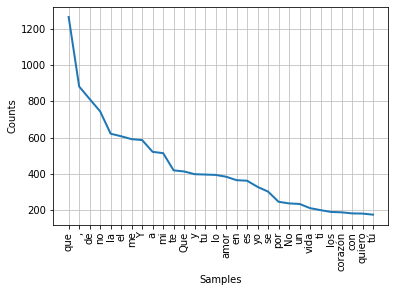

In [ ]:
conteo = FreqDist(palabras)
conteo.plot(30,cumulative=False)
plt.show()

Histograma de las 10 palabras más comunes con más de 7 caracteres

In [ ]:
pd.Series([w for w in palabras if len(w) > 7]).value_counts()
pd.Series([w for w in palabras if len(w) > 7]).value_counts()[:10][::-1].plot(kind='barh')

A continuación se presentan los bi-grams y tri-grams más frecuentes en el texto

In [ ]:
def ngramsplot(texto, n=2):
    gramsa = list(ngrams(texto.split(), n))
    gramsb = [' '.join(g) for g in [list(l) for l in gramsa]]
    lista = [h for h in gramsb]
    return lista

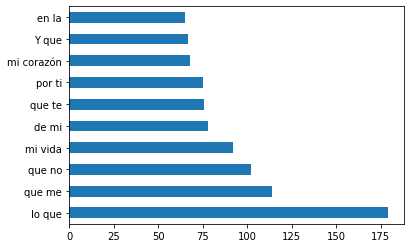

In [ ]:
pd.Series(ngramsplot(texto, 2)).value_counts()[:10].plot(kind='barh')

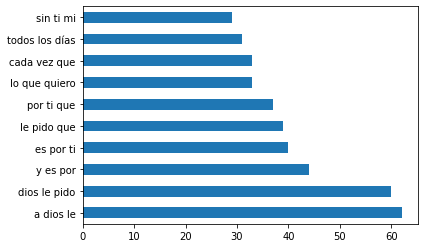

In [ ]:
pd.Series(ngramsplot(texto, 3)).str.lower().value_counts()[:10].plot(kind='barh')

## Wordclouds


Los wordclouds son una forma gráfica de observar las palabras más frecuentes, mientras más común sea una palabra, más grande y nítida se verá.



In [ ]:
from wordcloud import WordCloud
import numpy as npy
from PIL import Image

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texto)

In [ ]:
stop_words=set(stopwords.words("spanish"))
stop_words.update([""])

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(texto)

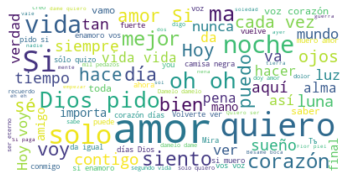

In [ ]:
plt.fLos igure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Red Neuronal

Importación de las capas necesarias y otras funciones útiles para el análisis de la red usando la librería tensorflow.keras

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Lambda
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import backend as K

Se separa el texto en grupos de 20 palabras

In [ ]:
texto
text = texto.split()
n = 20
corpus=[' '.join(text[i:i+n]) for i in rancoge(0,len(text),n)]

Se realiza el proceso de tokenizar en el *corpus* (donde se almacenan los grupos de 20 palabras cada uno)

Con esta lista de tokens se crean las frases de entrada a la red, el padding (en *pad_sequences*) se asegura de que todas estas frases tengan la misma longitud que la frase más larga, en caso de que falten palabras para tener la misma longitud, se le añade el número 0, el parámetro "pre" indica que estos 0 se van a añadir al principio de la secuencia


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
import numpy as np

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)

x_train = predictors.reshape([predictors.shape[0], 1,predictors.shape[1]])

In [ ]:
predictors.shape

(22534, 19)


Modelo de la red LSTM junto con sus respectivos parámetros y capas necesarias

In [ ]:
# setting
shape = [1,max_sequence_len-1]
#input_length=max_length-1
b_lstm_units = 150
lstm_units = 100
drop_out = 0.2
alpha_regularizer = 1e-4
alpha_regularizer_act = 1e-5
embedding_dim = 100
temp=2

# model
inputs = Input(shape=shape, name='nlp')
x = inputs
x = Embedding(total_words, embedding_dim, input_length=max_sequence_len-1, name='embedding')(x)
x = Reshape([shape[1],embedding_dim])(x)
print (K.shape(x))
x = Activation('relu')(x)
x = Bidirectional(LSTM(b_lstm_units, return_sequences = True))(x)
x = Dropout(drop_out)(x)
x = LSTM(lstm_units)(x)
x = Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(alpha_regularizer),
    bias_regularizer=regularizers.l2(alpha_regularizer),
    activity_regularizer=regularizers.l2(alpha_regularizer_act))(x)
x = Lambda(lambda x: x / temp)(x)
output = Dense(total_words,activation='softmax')(x)

Tensor("Shape:0", shape=(3,), dtype=int32)


Se guarda el modelo y se muestra su resumen así como su arquitectura

In [ ]:
model = Model(inputs, output, name='nlp_am')
model.summary()
plot_model(model,
          to_file='nlp.png',
          show_shapes=True)   

Se compila el modelo y se ajusta con 300 épocas.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 300

In [ ]:
history = model.fit(x_train, label, epochs=num_epochs,  verbose=1)

Gráficos de la precisión y pérdida del modelo

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Se guardan los pesos en *model.save*

In [ ]:
model.save("test.h5")

Para generar el texto es necesario darle al modelo un texto de semilla, este texto servirá como las primeras palabras del texto generado y a partir de este se genera el resto de la letra. 

También se debe ingresar la cantidad de palabras a generar después de la semilla.

In [ ]:
seed_text = "me gusta la vida"
next_words = 50
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    token_list = token_list.reshape([1,1,max_sequence_len-1])
    predicted = np.argmax(model.predict(token_list, verbose=1)[0])
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

In [ ]:
print(seed_text)